# Random Sample Imputation 

Aim : Random sample imputation consists of taking random observation from the dataset and we use this observation to replace teh NaN values

When should it be used? 
It assumes that the data are mising completely at Random (MCAR) 

In [55]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv",usecols=['Age','Survived','Fare'])

In [2]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [29]:
df['Age'].isnull().sum()

177

In [30]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [31]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [45]:
 df.loc[df['Age'].isnull(),'Age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [40]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    #It will have the random sample to fill the Nan
    random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    
    #Pandas need to have smae index in order to merge the dataset 
    random_sample.index= df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [42]:
median = df.Age.median()
median

28.0

In [43]:
impute_nan(df,'Age',median)

In [44]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [46]:
import matplotlib.pyplot as plt

%matplotlib inline

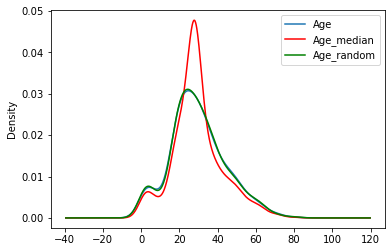

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,lables, = ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')


#### Advantages

Easy To implement

There is less distortion in variance

####  Disadvantage

Every situation randomness wont work
#### Capturing NAN values with a new feature
It works well if the data are not missing completely at random(MCAR)

In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv",usecols=['Age','Survived','Fare'])

In [84]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [85]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [86]:
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [87]:
df['Age'].fillna(df.Age.median,inplace=True )


#### Advantages

Easy to implement

Captures the importance of missing values
#### Disadvantages
Creating Additional Features(Curse of Dimensionality)

#### End of Distrubution imputation

In [89]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv",usecols=['Age','Survived','Fare'])

In [90]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

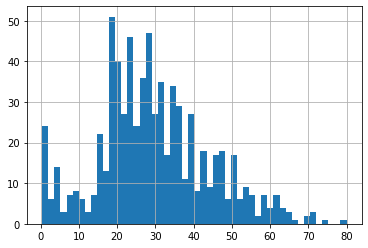

In [94]:
df.Age.hist(bins=50)

In [98]:
extreme = df.Age.mean()+3*df.Age.std()

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

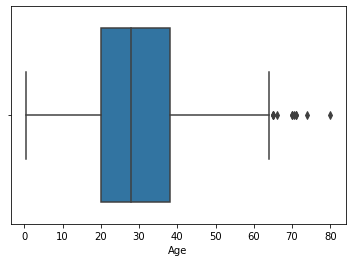

In [97]:
import seaborn as sns 
sns.boxplot('Age',data=df)

In [99]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [103]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [104]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

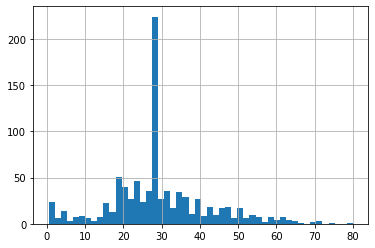

In [106]:
df['Age'].hist(bins=50)

<AxesSubplot:>

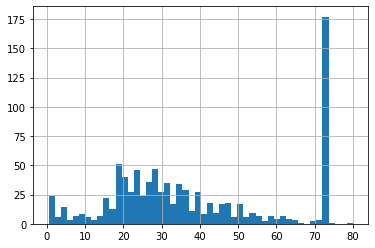

In [107]:
df['Age_end_distribution'].hist(bins=50)

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

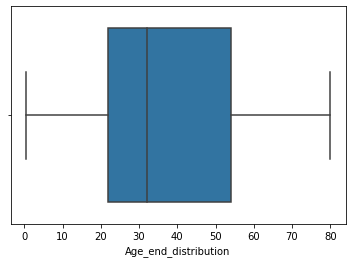

In [108]:
sns.boxplot('Age_end_distribution',data=df)

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

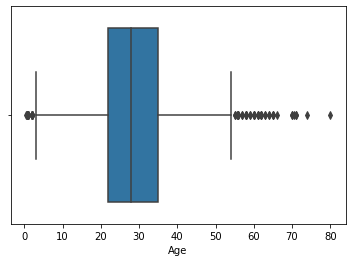

In [109]:
sns.boxplot('Age',data=df)

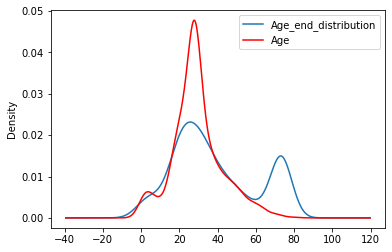

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age_end_distribution'].plot(kind='kde',ax=ax)
df.Age.plot(kind='kde',ax=ax,color='red')
lines,lables, = ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')


### Advantages 
Easy to implement

Caputer the importancce of missingness if there is one 

### Disadvantages 
Distorts the orginal distribution of the variable 

If missignes is not important, it may mask the predicitive power of the original variable by distribution 

if the number of NA is big, it will make mask true outliers in the distribution

if the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequesnt in the feature engineering